In [1]:
#In this code we will do a simple point mass simulation of the MW-M31 system
#Reason being to get a rough idea of the velocity/distance profile of the merger in function of time
#This can then be used to check if the galaxy model has a similar profile

#If we want to check this profile with a random particle in M31 we have to remember that these experience
#an additional motion so you can't compare velocity easily, one would have to average out over multiple M31 particles

In [3]:
#Structure of the code:
# Initialise: Define the point mass particles, displace them properly using a rotation matrix, 
#add the radial and tangential velocity to M31

#Main code:
#Run gravity solver for a certain timestep
#After this timestep calculate the velocities and the distance
#Save these values and continue evolving

#Once done we can plot velocity in function of time, distance in function of time.

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from amuse.lab import units,Particles



In [192]:
rotation = np.array([[0.7703,  0.3244,  0.5490],
                     [-0.6321, 0.5017,  0.5905],
                     [-0.0839, -0.8019, 0.5915]])

translation = [-379.2, 612.7, 283.1] | units.kpc
radial_velocity = 117 * np.array([0.4898, -0.7914, 0.3657]) | units.kms
transverse_velocity = 70 * np.array([0.5236, 0.6024, 0.6024]) | units.kms

In [193]:
System = Particles(2)
MW = System[0]
M31 = System[1]
MW.mass = 2*10**12 | units.MSun  #Using much larger mass
MW.position = (0,0,0) | units.kpc
MW.velocity = (0,0,0) | units.kms
M31.mass = 3*10**12 | units.MSun
M31.position = translation
M31.velocity = radial_velocity + transverse_velocity

In [194]:
unit = 1 | units.m**-2 * units.s**2   #To get rid of m^2/s^2 
a = math.sqrt((M31.velocity[0]**2+M31.velocity[1]**2+M31.velocity[2]**2)*unit)
print(a/1000)
print(M31.velocity)
b = MW.position - M31.position
print(b)
unit2 = 1 | units.kpc**-2
c = math.sqrt((b[0]**2 + b[1]**2 + b[2]**2)*unit2)
print(c)

136.33897041422162
[93.9586, -50.4258, 84.9549] kms
[379.2, -612.7, -283.1] kpc
774.1702267589474


In [195]:
from amuse.units.constants import G

Timestep = 1 | units.Myr
unity3 = 1 | units.Myr**-1
VMW = []
VM31 = [] 
R = [] 
Time = np.arange(0, 15000, Timestep*unity3)
b = M31.position - MW.position
for i in Time:
    if i == 0 :
        Stepper = 0.5 * Timestep
    else:
        Stepper = Timestep
    Distance = (math.sqrt((b[0]**2 + b[1]**2 + b[2]**2)*unit2)) | units.kpc
    Unit = 1/Distance * b
    M31.velocity = M31.velocity - (G*MW.mass)/(Distance**2)*Unit*Stepper
    MW.velocity = MW.velocity + (G*M31.mass)/(Distance**2)*Unit*Stepper
    
    MW.position = MW.position + MW.velocity*Timestep
    M31.position = M31.position + M31.velocity*Timestep
    
    
    VMW.append(0.001*math.sqrt((MW.velocity[0]**2+MW.velocity[1]**2+MW.velocity[2]**2)*unit))
    VM31.append(0.001*math.sqrt((M31.velocity[0]**2+M31.velocity[1]**2+M31.velocity[2]**2)*unit))
    b = M31.position - MW.position
    R.append(math.sqrt((b[0]**2 + b[1]**2 + b[2]**2)*unit2))
    



<function matplotlib.pyplot.show(close=None, block=None)>

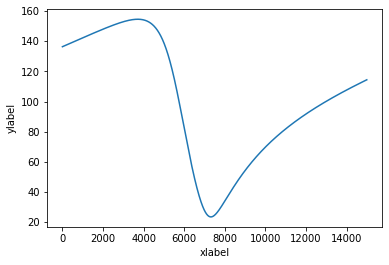

In [215]:
plot(Time,VM31)
plt.xlabel('Time (Myear)')
plt.ylabel('Velocity (km/s)')
plt.show()

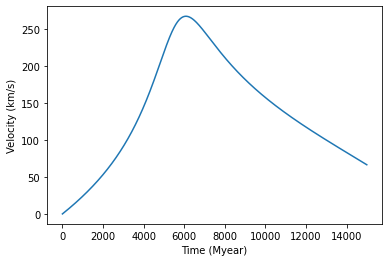

In [216]:
plot(Time,VMW)
plt.xlabel('Time (Myear)')
plt.ylabel('Velocity (km/s)')
plt.show()

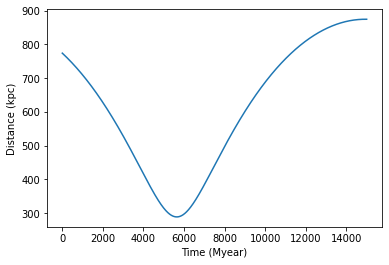

In [217]:
plot(Time,R)
plt.xlabel('Time (Myear)')
plt.ylabel('Distance (kpc)')
plt.show()